# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [4]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileName = "ainvert.py"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

In [14]:
def draw_img_g(img, title=None):
    plt.figure(figsize=(img.shape[0]/100,img.shape[1]/100), dpi=200)
    if title:
        plt.title(title)
    plt.imshow(img, cmap ="gray")
    plt.xticks([]), plt.yticks([]) 
    plt.show()

In [5]:
parrot = cv2.imread('parrot.bmp', cv2.IMREAD_GRAYSCALE)
clock = cv2.imread('clock.bmp', cv2.IMREAD_GRAYSCALE)
chessboard = cv2.imread('chessboard.bmp', cv2.IMREAD_GRAYSCALE)
firetruck = cv2.imread('firetruck.jpg', cv2.IMREAD_GRAYSCALE)
lena = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

In [18]:
from ainvert import A_invert

def bicubic_interpolation(img, horizontal_scale, vertical_scale):
    def I_x(i,j):
        try:
            return (img[i][j + 1] - img[i][j - 1]) / 2
        except IndexError:
            return 0
        
    def I_y(i,j):
        try:
            return (img[i + 1][j] - img[i - 1][j]) / 2
        except IndexError:
            return 0
    
    def I_xy(i,j):
        try:
            return (img[i + 1][j + 1] - img[i - 1][j + 1] - img[i + 1][j - 1] + img[i - 1][j - 1]) / 4
        except IndexError:
            return 0

    h, w = img.shape
    h_scale, w_scale = int(h * horizontal_scale), int(w * vertical_scale)

    scale_img = np.zeros((h_scale, w_scale))

    for i in range(h_scale):
        for j in range(w_scale):
            i_1 = int(i / horizontal_scale)
            j_1 = int(j / vertical_scale)
            i_2 = min(i_1 + 1, h - 1)
            j_2 = min(j_1 + 1, w - 1)

            f_A = img[i_1][j_1]
            f_B = img[i_1][j_2]
            f_C = img[i_2][j_1]
            f_D = img[i_2][j_2]

            A_x = I_x(i_1, j_1)
            B_x = I_x(i_1, j_2)
            C_x = I_x(i_2, j_1)
            D_x = I_x(i_2, j_2)

            A_y = I_y(i_1, j_1)
            B_y = I_y(i_1, j_2)
            C_y = I_y(i_2, j_1)
            D_y = I_y(i_2, j_2)

            A_xy = I_xy(i_1, j_1)
            B_xy = I_xy(i_1, j_2)
            C_xy = I_xy(i_2, j_1)
            D_xy = I_xy(i_2, j_2)

            x = np.array([f_A, f_B, f_C, f_D, A_x, B_x, C_x, D_x, A_y, B_y, C_y, D_y, A_xy, B_xy, C_xy, D_xy], dtype=np.float64)

            a = (A_invert @ x).reshape((4,4)).T

            scale_i = int(i / horizontal_scale) - i_1
            scale_j = int(j / vertical_scale) - j_1

            scale_img[i][j] = np.power(scale_j, [0, 1, 2, 3]) @ a @ np.power(scale_i, [0, 1, 2, 3])

    return scale_img

C:\Users\Dariusz\AppData\Local\Temp\ipykernel_2596\1191180440.py:6: RuntimeWarning: overflow encountered in scalar subtract
  return (img[i][j + 1] - img[i][j - 1]) / 2
C:\Users\Dariusz\AppData\Local\Temp\ipykernel_2596\1191180440.py:12: RuntimeWarning: overflow encountered in scalar subtract
  return (img[i + 1][j] - img[i - 1][j]) / 2
C:\Users\Dariusz\AppData\Local\Temp\ipykernel_2596\1191180440.py:18: RuntimeWarning: overflow encountered in scalar subtract
  return (img[i + 1][j + 1] - img[i - 1][j + 1] - img[i + 1][j - 1] + img[i - 1][j - 1]) / 4
C:\Users\Dariusz\AppData\Local\Temp\ipykernel_2596\1191180440.py:18: RuntimeWarning: overflow encountered in scalar add
  return (img[i + 1][j + 1] - img[i - 1][j + 1] - img[i + 1][j - 1] + img[i - 1][j - 1]) / 4


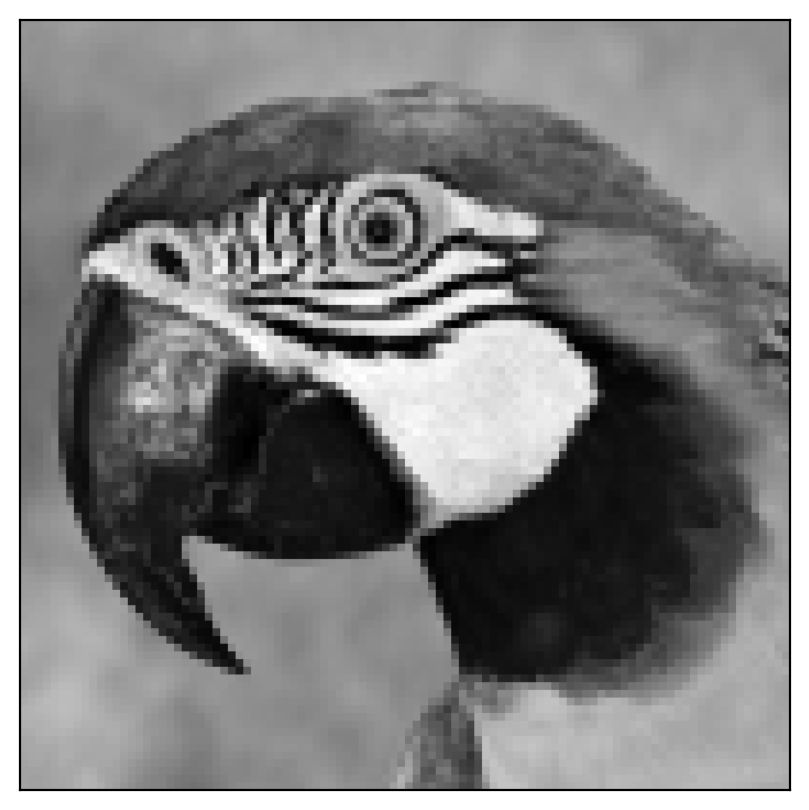

In [23]:
draw_img_g(bicubic_interpolation(parrot, 5, 5))

C:\Users\Dariusz\AppData\Local\Temp\ipykernel_2596\1191180440.py:18: RuntimeWarning: overflow encountered in scalar subtract
  return (img[i + 1][j + 1] - img[i - 1][j + 1] - img[i + 1][j - 1] + img[i - 1][j - 1]) / 4
C:\Users\Dariusz\AppData\Local\Temp\ipykernel_2596\1191180440.py:18: RuntimeWarning: overflow encountered in scalar add
  return (img[i + 1][j + 1] - img[i - 1][j + 1] - img[i + 1][j - 1] + img[i - 1][j - 1]) / 4


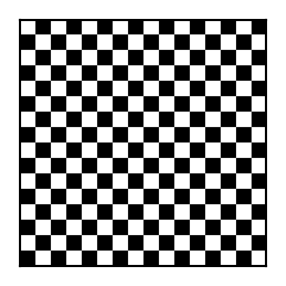

In [22]:
draw_img_g(bicubic_interpolation(chessboard, 10, 10))

C:\Users\Dariusz\AppData\Local\Temp\ipykernel_2596\1191180440.py:18: RuntimeWarning: overflow encountered in scalar subtract
  return (img[i + 1][j + 1] - img[i - 1][j + 1] - img[i + 1][j - 1] + img[i - 1][j - 1]) / 4
C:\Users\Dariusz\AppData\Local\Temp\ipykernel_2596\1191180440.py:18: RuntimeWarning: overflow encountered in scalar add
  return (img[i + 1][j + 1] - img[i - 1][j + 1] - img[i + 1][j - 1] + img[i - 1][j - 1]) / 4
C:\Users\Dariusz\AppData\Local\Temp\ipykernel_2596\1191180440.py:12: RuntimeWarning: overflow encountered in scalar subtract
  return (img[i + 1][j] - img[i - 1][j]) / 2
C:\Users\Dariusz\AppData\Local\Temp\ipykernel_2596\1191180440.py:6: RuntimeWarning: overflow encountered in scalar subtract
  return (img[i][j + 1] - img[i][j - 1]) / 2


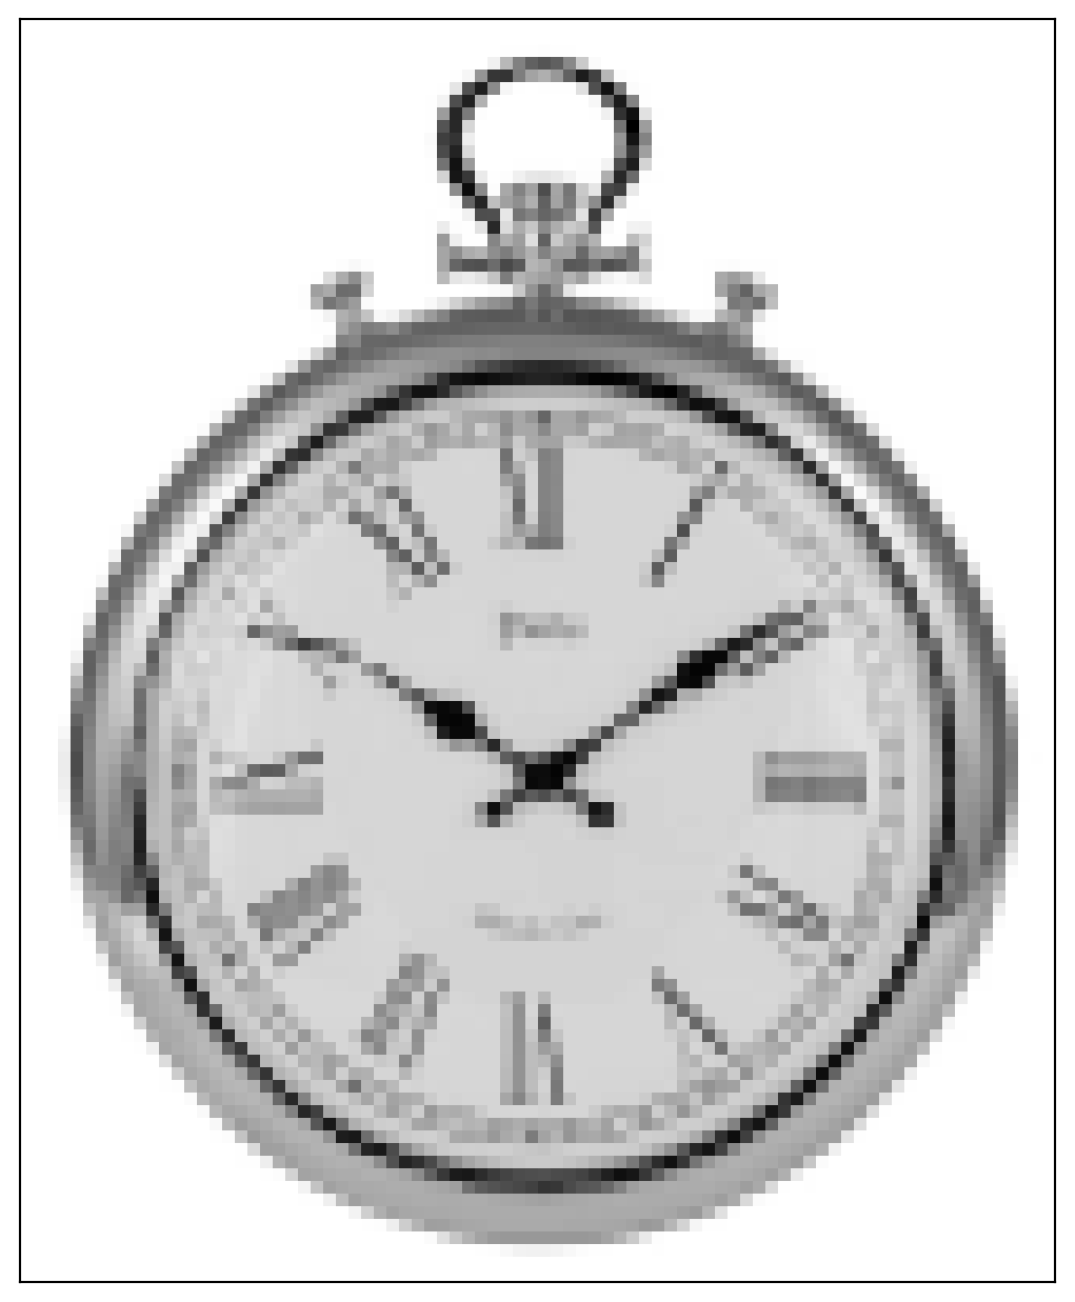

In [24]:
draw_img_g(bicubic_interpolation(clock, 10, 10))

In [25]:
draw_img_g(bicubic_interpolation(lena, 10, 10))

C:\Users\Dariusz\AppData\Local\Temp\ipykernel_2596\1191180440.py:12: RuntimeWarning: overflow encountered in scalar subtract
  return (img[i + 1][j] - img[i - 1][j]) / 2
C:\Users\Dariusz\AppData\Local\Temp\ipykernel_2596\1191180440.py:18: RuntimeWarning: overflow encountered in scalar subtract
  return (img[i + 1][j + 1] - img[i - 1][j + 1] - img[i + 1][j - 1] + img[i - 1][j - 1]) / 4
C:\Users\Dariusz\AppData\Local\Temp\ipykernel_2596\1191180440.py:18: RuntimeWarning: overflow encountered in scalar add
  return (img[i + 1][j + 1] - img[i - 1][j + 1] - img[i + 1][j - 1] + img[i - 1][j - 1]) / 4
C:\Users\Dariusz\AppData\Local\Temp\ipykernel_2596\1191180440.py:6: RuntimeWarning: overflow encountered in scalar subtract
  return (img[i][j + 1] - img[i][j - 1]) / 2


KeyboardInterrupt: 